Dated 12/02/25

*   Aditi
*   M.Tech. CSA
*   242211001
*   Timestamp: 12.30 PM

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [ ]:
df=pd.read_csv("diabetes.csv")

Data Exploration and Preprocessing:
1. Analyze the distribution of each feature.
2. Handle missing values (if any) appropriately.
3. Perform feature scaling if required

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: xlabel='Age', ylabel='Density'>

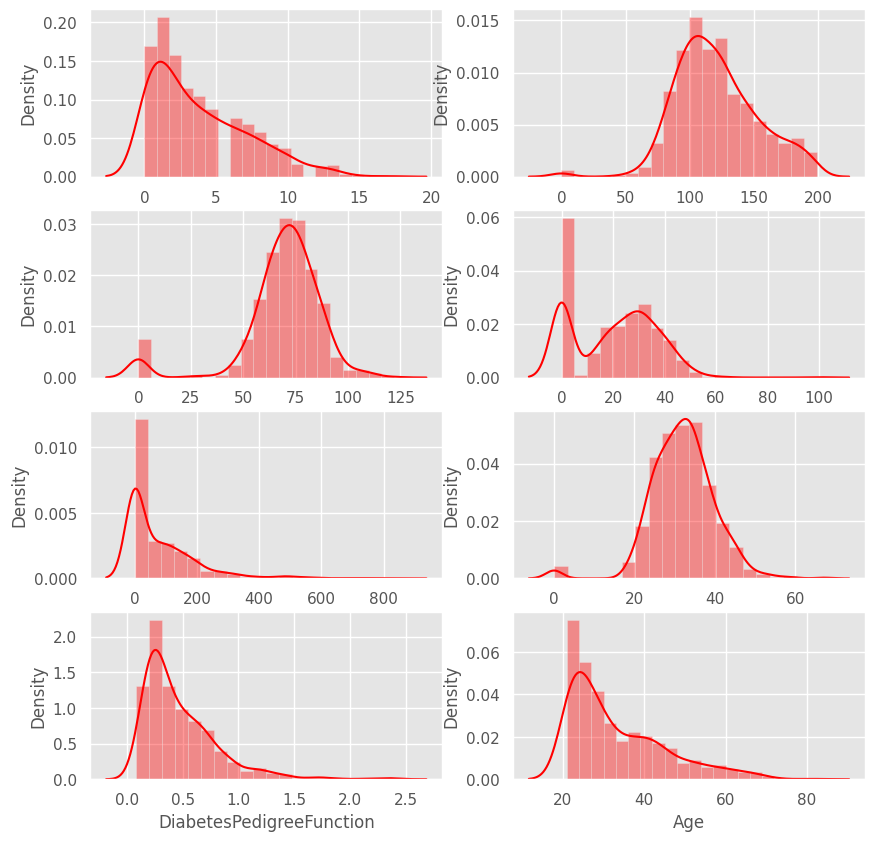

In [ ]:
fig,ax = plt.subplots(4,2, figsize=(10,10))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


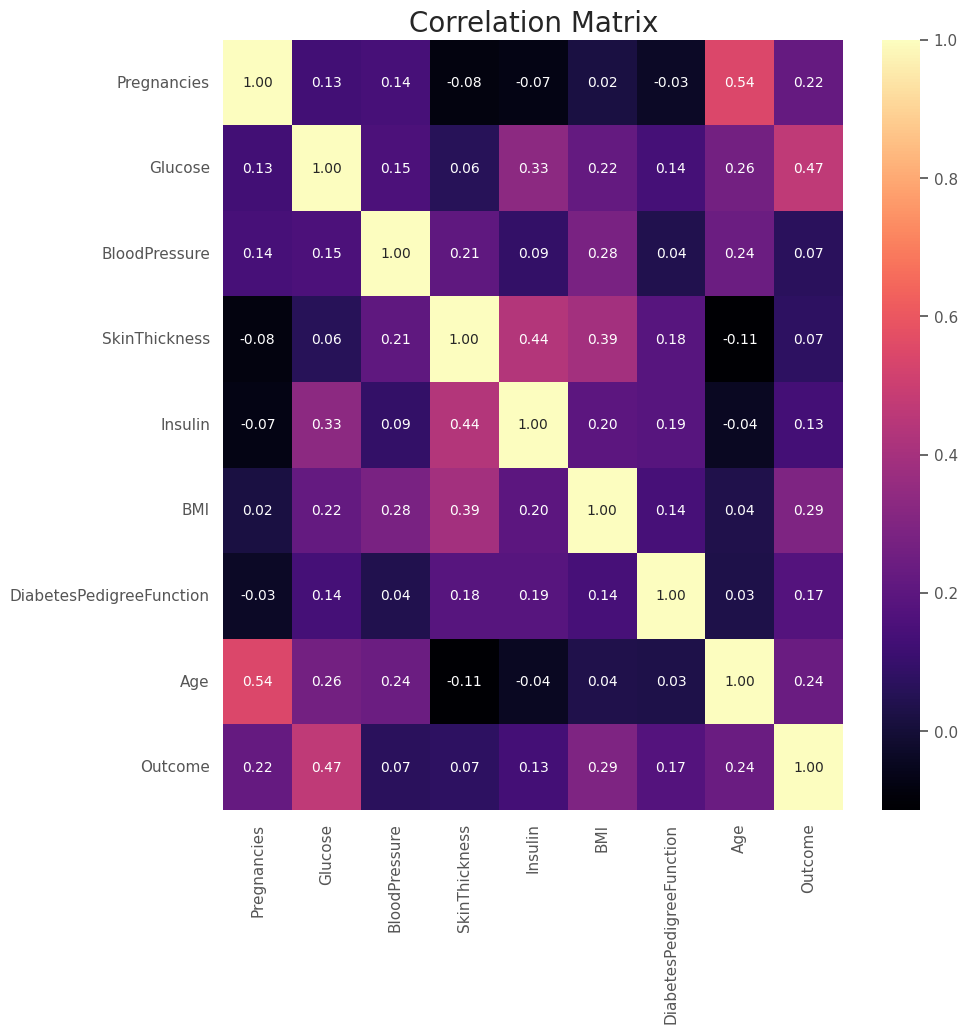

In [ ]:
f,ax = plt.subplots(figsize=[10,10])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
y=df['Outcome']
X=df.drop(['Outcome'], axis=1)

In [ ]:
cols = X.columns
index = X.index

In [ ]:
from sklearn.preprocessing import RobustScaler
s = RobustScaler().fit(X)
X=s.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

Model Implementation:
1. Implement the K-Nearest Neighbors (KNN) classifier using Scikit-learn.
2. Experiment with different values of K (number of neighbours) and find the
optimal value.
3. Use Euclidean distance as the similarity measure.

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
y_pred1 = knn1.predict(X_test)

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train, y_train)
y_pred2 = knn2.predict(X_test)

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors=10)
knn3.fit(X_train, y_train)
y_pred3 = knn3.predict(X_test)

Performance Evaluation:
1. Evaluate the model using accuracy, precision, and recall metrics.
2. Plot a confusion matrix to evaluate classification performance.
3. Compare model performance for different values of K.

In [ ]:
print("Training accuracy: ",accuracy_score(y_train, knn1.predict(X_train)))
print("Testing accuracy: ",accuracy_score(y_test, knn1.predict(X_test)))
print("\nConfusion matrix: \n")
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

Training accuracy:  1.0
Testing accuracy:  0.6753246753246753

Confusion matrix: 

[[82 25]
 [25 22]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       107
           1       0.47      0.47      0.47        47

    accuracy                           0.68       154
   macro avg       0.62      0.62      0.62       154
weighted avg       0.68      0.68      0.68       154



In [ ]:
print("Training accuracy: ",accuracy_score(y_train, knn2.predict(X_train)))
print("Testing accuracy: ",accuracy_score(y_test, knn2.predict(X_test)))
print("\nConfusion matrix: \n")
print(confusion_matrix(y_test, y_pred2))
print("\nClassification report: \n")
print(classification_report(y_test, y_pred2))

Training accuracy:  0.8045602605863192
Testing accuracy:  0.7857142857142857

Confusion matrix: 

[[92 15]
 [18 29]]

Classification report: 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154



In [ ]:
print("Training accuracy: ",accuracy_score(y_train, knn3.predict(X_train)))
print("Testing accuracy: ",accuracy_score(y_test, knn3.predict(X_test)))
print("\nConfusion matrix: \n")
print(confusion_matrix(y_test, y_pred3))
print("\nClassification report: \n")
print(classification_report(y_test, y_pred3))

Training accuracy:  0.7801302931596091
Testing accuracy:  0.7857142857142857

Confusion matrix: 

[[95 12]
 [21 26]]

Classification report: 

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       107
           1       0.68      0.55      0.61        47

    accuracy                           0.79       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154



Since accuracy seems constant after k=5, we will check for k=3

In [ ]:
knn4 = KNeighborsClassifier(n_neighbors=3)
knn4.fit(X_train, y_train)
y_pred4 = knn4.predict(X_test)
print("Training accuracy: ",accuracy_score(y_train, knn4.predict(X_train)))
print("Testing accuracy: ",accuracy_score(y_test, knn4.predict(X_test)))
print("\nConfusion matrix: \n")
print(confusion_matrix(y_test, y_pred4))
print("\nClassification report: \n")
print(classification_report(y_test, y_pred4))

Training accuracy:  0.8501628664495114
Testing accuracy:  0.7597402597402597

Confusion matrix: 

[[92 15]
 [22 25]]

Classification report: 

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       107
           1       0.62      0.53      0.57        47

    accuracy                           0.76       154
   macro avg       0.72      0.70      0.70       154
weighted avg       0.75      0.76      0.75       154



Since accuracy seems lesser for k=3, we will check for k=4

In [ ]:
knn4 = KNeighborsClassifier(n_neighbors=4)
knn4.fit(X_train, y_train)
y_pred4 = knn4.predict(X_test)
print("Training accuracy: ",accuracy_score(y_train, knn4.predict(X_train)))
print("Testing accuracy: ",accuracy_score(y_test, knn4.predict(X_test)))
print("\nConfusion matrix: \n")
print(confusion_matrix(y_test, y_pred4))
print("\nClassification report: \n")
print(classification_report(y_test, y_pred4))

Training accuracy:  0.7980456026058632
Testing accuracy:  0.7532467532467533

Confusion matrix: 

[[99  8]
 [30 17]]

Classification report: 

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       107
           1       0.68      0.36      0.47        47

    accuracy                           0.75       154
   macro avg       0.72      0.64      0.66       154
weighted avg       0.74      0.75      0.73       154



Hence the optimal value of k is 5.

1. Identify any two limitations of KNN for this dataset.

Ans.
*   KNN doesn't handle noisy or irrelevant data well. Medical datasets can sometimes include errors or outliers (e.g., incorrect measurements, misdiagnosed cases) that can significantly affect the predictions of KNN. Since KNN relies heavily on the distances between points, even small amounts of noise can lead to incorrect predictions.
*   In high-dimensional spaces, distance metrics (like Euclidean distance, which KNN uses) become less meaningful because the data points spread out, and all points seem equally far apart. This makes it harder for KNN to accurately determine which neighbors are relevant.
*   KNN tends to favor the majority class because it simply picks the most frequent label among the nearest neighbors. This can lead to biased predictions and poor performance for rare conditions.









2. What happens when K is too small or too large?

Ans.

*   K is too small: overfitting; noise sensitivity
*   K is too large: underfitting; less sensitive to local patterns.

